# Team Zesta - Theme Computer Vision for the ICHack2.0 Phase-2 MUJ 
## (Problem Statement 2) - Advanced Autonomous Vehicle(AV) Self Driving System
#### Technolgies/Softwares/Non-Standard libraries used: 
   - CARLA (Open Source AV Simulator)
   - Keras (To implement Deep Learning Models)
   - Tensorflow (To train the model weights)
   - Pygame (To enable the model to imitate human-like input to the simulator)
   - OpenCV (To fetch and display/manipulate the data collected from virtual senors, videlicet, RGB Camera, LiDAR, Collision Detector)

In [1]:
# Importing standard libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
import time
import os

In [2]:
# Importing Machine Learning & Deep Learning Libraries
# Installed tensorflow directML instead in order to have AMD GPU support in Windows 10 for model training
import tensorflow as tf

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth and making sure that the dedicated gpus are recognizable to tensorflow
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [4]:
import carla
import pygame

client = carla.Client('localhost', 2000)
client.set_timeout(5.0)
world = client.load_world(
    'Town05'
)

bp_lib = world.get_blueprint_library()

<frozen importlib._bootstrap>:219: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.5.2 (SDL 2.28.4, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
world.wait_for_tick()
actor_list = world.get_actors().filter(
    '*model3*'
)
vehicle_list = []
for vehicle in actor_list:
    vehicle_list.append(vehicle)

vehicle = vehicle_list[0]

def set_spectator(world):
    spectator = world.get_spectator()
    transform = carla.Transform(vehicle.get_transform().transform(carla.Location(x=-8, z=3)), vehicle.get_transform().rotation)
    spectator.set_transform(transform)

set_spectator(world)
spawn_points = world.get_map().get_spawn_points()

In [6]:
# NPC Traffic. 
for i in range(200):
    vehicle_bp = random.choice(bp_lib.filter('vehicle'))
    npc = world.try_spawn_actor(vehicle_bp, random.choice(spawn_points))

#Set traffic in motion
for v in world.get_actors().filter('*vehicle*'):
    v.set_autopilot(True)
    
# Making sure that the non-deep-learning model is built into the simulator is turned off
vehicle.set_autopilot(False)

In [ ]:
# Real-Time RGBA sensor/camera footage
import queue
import cv2
from collections import deque
camera_bp = bp_lib.find('sensor.camera.rgb')
camera_init_trans = carla.Transform(carla.Location(x =-2,z=10))

camera_bp.set_attribute('image_size_x', '1024')
camera_bp.set_attribute('image_size_y', '720')

camera = world.spawn_actor(camera_bp, camera_init_trans, attach_to=vehicle)

image_queue = queue.Queue()
camera.listen(image_queue.put)

while True:
    # Retrieve and reshape the image
    world.tick()
    image = image_queue.get()

    img = np.reshape(np.copy(image.raw_data), (image.height, image.width, 4))
    cv2.imshow('ImageWindowName',img)
    plt.imshow(img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

# Semantic Segmentation of lanes using a RGBA Camera
- Making using of a CNN Algorithm to semantically segment the camera footage post pre-processing

In [19]:
img_dir = os.path.join('archive', 'train_label', 'Town04_Clear_Noon_09_09_2020_14_57_22_frame_0_label.png')

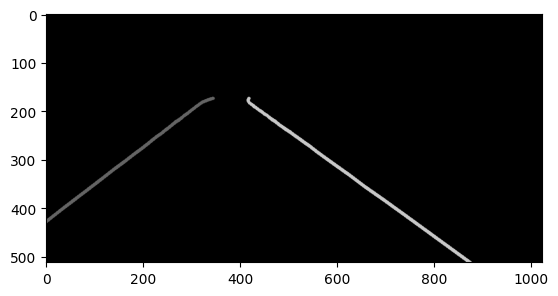

In [7]:
import cv2
img = cv2.imread(img_dir)
plt.imshow(100*cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Training of the data set continued in model_build.ipynb